In [2]:
import pandas as pd

In [3]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [4]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [5]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [6]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [9]:
diabetes[cols_to_norm]  = diabetes[cols_to_norm].apply(lambda x: (x - x.min())/(x.max() - x.min()))

In [10]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [11]:
import tensorflow as tf

In [12]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [13]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [30]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [15]:
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=4)

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import style
style.use('ggplot')

(array([ 173.,  127.,   96.,   61.,   41.,   51.,   47.,   39.,   34.,
          18.,   21.,   13.,   15.,   11.,    8.,    8.,    3.,    1.,
           0.,    1.]),
 array([ 21.,  24.,  27.,  30.,  33.,  36.,  39.,  42.,  45.,  48.,  51.,
         54.,  57.,  60.,  63.,  66.,  69.,  72.,  75.,  78.,  81.]),
 <a list of 20 Patch objects>)

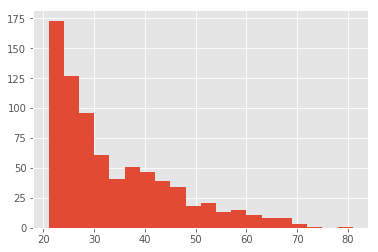

In [27]:
plt.hist(diabetes['Age'],bins=20)

In [28]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [31]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,assigned_group,age_bucket]

In [33]:
# TRAIN TEST SPLIT 
x_data = diabetes.drop('Class',axis=1)

In [36]:
labels = diabetes['Class']

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_data,labels,test_size=0.3,random_state=101)

In [41]:
input_func = tf.estimator.inputs.pandas_input_fn(x = X_train,y = y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [40]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\VINITJ~1\\AppData\\Local\\Temp\\tmp9_sklafj', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E6C62D3DD8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [42]:
model.train(input_fn = input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\VINITJ~1\AppData\Local\Temp\tmp9_sklafj\model.ckpt.
INFO:tensorflow:loss = 6.93147, step = 1
INFO:tensorflow:global_step/sec: 73.4238
INFO:tensorflow:loss = 5.94077, step = 101 (1.368 sec)
INFO:tensorflow:global_step/sec: 163.937
INFO:tensorflow:loss = 6.09368, step = 201 (0.621 sec)
INFO:tensorflow:global_step/sec: 158.984
INFO:tensorflow:loss = 8.08562, step = 301 (0.628 sec)
INFO:tensorflow:global_step/sec: 122.992
INFO:tensorflow:loss = 6.61044, step = 401 (0.822 sec)
INFO:tensorflow:global_step/sec: 123.155
INFO:tensorflow:loss = 4.98744, step = 501 (0.810 sec)
INFO:tensorflow:global_step/sec: 143.68
INFO:tensorflow:loss = 7.69316, step = 601 (0.685 sec)
INFO:tensorflow:global_step/sec: 142.655

In [43]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x  = X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [44]:
results = model.evaluate(input_fn = eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-08-14-17:10:46
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\VINITJ~1\AppData\Local\Temp\tmp9_sklafj\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-08-14-17:10:48
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74026, accuracy_baseline = 0.649351, auc = 0.795062, auc_precision_recall = 0.636219, average_loss = 0.531332, global_step = 1000, label/mean = 0.350649, loss = 5.11407, precision = 0.652174, prediction/mean = 0.373791, recall = 0.555556


In [45]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test,batch_size=10,num_epochs=1,shuffle=False)

In [46]:
predictions = model.predict(input_fn = pred_input_func)

In [47]:
my_pred = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\VINITJ~1\AppData\Local\Temp\tmp9_sklafj\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [52]:
my_pred

[{'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.53587949], dtype=float32),
  'logits': array([ 0.14376509], dtype=float32),
  'probabilities': array([ 0.46412051,  0.53587949], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.61882931], dtype=float32),
  'logits': array([ 0.48458219], dtype=float32),
  'probabilities': array([ 0.38117072,  0.61882931], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.38496944], dtype=float32),
  'logits': array([-0.46850801], dtype=float32),
  'probabilities': array([ 0.61503059,  0.38496944], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.34938052], dtype=float32),
  'logits': array([-0.62176341], dtype=float32),
  'probabilities': array([ 0.65061951,  0.34938049], dtype=flo

In [53]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\VINITJ~1\\AppData\\Local\\Temp\\tmp7enfo_13', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E6C6968BA8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [54]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group,dimension=4)

In [56]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,embedded_group_col,age_bucket]

In [57]:
input_func = tf.estimator.inputs.pandas_input_fn(x = X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [62]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\VINITJ~1\\AppData\\Local\\Temp\\tmptpk72sk9', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E6C676BA20>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [63]:
dnn_model.train(input_fn = input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\VINITJ~1\AppData\Local\Temp\tmptpk72sk9\model.ckpt.
INFO:tensorflow:loss = 6.87168, step = 1
INFO:tensorflow:global_step/sec: 96.8085
INFO:tensorflow:loss = 6.85646, step = 101 (1.041 sec)
INFO:tensorflow:global_step/sec: 186.563
INFO:tensorflow:loss = 4.74826, step = 201 (0.532 sec)
INFO:tensorflow:global_step/sec: 193.052
INFO:tensorflow:loss = 5.24154, step = 301 (0.520 sec)
INFO:tensorflow:global_step/sec: 190.127
INFO:tensorflow:loss = 9.30665, step = 401 (0.535 sec)
INFO:tensorflow:global_step/sec: 185.864
INFO:tensorflow:loss = 5.17581, step = 501 (0.534 sec)
INFO:tensorflow:global_step/sec: 188.338
INFO:tensorflow:loss = 5.14937, step = 601 (0.531 sec)
INFO:tensorflow:global_step/sec: 199.60

In [64]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test,y = y_test,batch_size=10,num_epochs=1,shuffle=False)

In [65]:
dnn_model.evaluate(input_fn = eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-08-14-17:22:42
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\VINITJ~1\AppData\Local\Temp\tmptpk72sk9\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-08-14-17:22:44
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.78355, accuracy_baseline = 0.649351, auc = 0.830123, auc_precision_recall = 0.740063, average_loss = 0.486041, global_step = 1000, label/mean = 0.350649, loss = 4.67815, precision = 0.712329, prediction/mean = 0.337182, recall = 0.641975


{'accuracy': 0.78354979,
 'accuracy_baseline': 0.64935064,
 'auc': 0.83012348,
 'auc_precision_recall': 0.74006331,
 'average_loss': 0.48604134,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.6781478,
 'precision': 0.71232879,
 'prediction/mean': 0.33718222,
 'recall': 0.64197528}